In [18]:
#These are the libraries you can use.  You may add any libraries directy related to threading if this is a direction
#you wish to go (this is not from the course, so it's entire‰ly on you if you wish to use threading).  Any
#further libraries you wish to use you must email me, james@uwaterloo.ca, for permission.

from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
import random
from datetime import datetime
import time

## Group Assignment
### Team Number: 04
### Team Member Names: Arav Talati, Iris Hu, Nyra Rodrigues
### Team Strategy Chosen: Market Beat

Disclose any use of AI for this assignment below (detail where and how you used it).  Please see the course outline for acceptable uses of AI.


Overview of our strategy:

The market beat strategy that we demonstrate below is based off of 4 key metrics, those being beta, sharpe ratio, moving average, and p/e ratio. These metrics were carefully considered and selected, based on their relevance to the lessons that we have been learning in CFM, as well as their synchronisity with each other. 

First when considering a market beat strategy, we determined there was two routes we could go, either a strategy in which we buy against the market in order to make a return, or buy with the market, and use the fact that the market is going to up to make a bigger profit. We decided on the latter, as historically over the long-term the stock market (in this case the S&P and TSX index) grows at rate of around 7-8% per year.

Next was determining which metric we wanted to place the most focus on. Based on what we learned in class, we decided that beta would be a great place to cut down on a lot of stocks. Since we are buying stocks that positively correlate with the market, we want to find stocks with values of beta that are greater than 1. What this means is that for every 1 percent the market goes up, the stock would increase by more than 1 percent. Creating a portfolio of these stocks would ensure that when the market goes up, the portfolio would go up a lot more.

As mentioned above, one of important things we considered was synchronisity between the metrics we chose. While beta gives us a good starting point, it is a little risky. What we wanted to consider next was whether the risk we were taking with the stocks with a high beta was worth it. As we learned in class, the sharpe ratio is a ratio that measures the risk-adjusted return. When left with stocks with high beta, this tandem of metrics produces stocks that lower the potential of a single stock weighing down the entire portfolio. 

Next we moved into metrics that were not discussed extensively in class, but were still quite relevant to this discussion. those being the moving average and p/e ratio. When discussing the moving average, we decided to compare the long-term and short-term moving average to each other. The reasoning for this is to filter out stocks that may be on a major trend downwards in terms of how the stock performed historically to how it is performing now. If the stock significantly performs worse now than it did before, it is indicative that the stock price is trending downwards, and thus is not going to have a positive impact on the end portfolio. Those that have a greater short term moving average than long-term moving average show signs of growth, which is better for the market beat strategy.

Finally, the last metric is the p/e ratio of the stock. P/E ratio measures how valuable a company is in the eyes of the market compared to its actual value (compares the price of the stock (p) to the earnings per share (e)). A high p/e ratio usually correspond to companies that are expected to expand rapidly, even if they do not generate substantial profits. A high P/E ratio can signal that the market expects significant growth, which aligns with the objectives of our growth-focused strategy. Sometimes a high p/e can signify that a company is overvalued, which is why we use the other metrics, specifically the sharpe ratio and even to an extent the moving average, to filter out companies that may be overvalued of the market instead of actually having potential for growth. 

However, since the p/e ratio is not very reliable, rather than filtering out stocks based on this metric, we use it to determine the weighting of our portfolio. At the end of filtering the stocks with the other 3 metrics, we rank the remaining stocks on each of the 4 categories and score them, giving the highest score to the stock that is highest in the most categories, and the lowest score to the stock that is relatively lower than the other stocks in most of the categories. Then we compare this score to the total score of all the stocks in the portfolio to determine the weighting of the portfolio. This ensures that the stocks that align the best with our metrics make up most of the portfolio, and those that do not, make up less of the portfolio.

The following is the code that goes through each of these steps. At the end we also produce a graph to show how this portfolio would perform historically starting from September of last year, to reinforce whether our strategy is effective.

In [19]:
stock_csv = "Tickers_Example2.csv"

# Read the stock symbols from CSV
stocks = pd.read_csv(stock_csv, header=None)
stocks.columns = ['Column1']

start_date = "2023-10-01"
end_date = "2024-09-30"

stock_list = []

# Loop through each ticker
for tckr in stocks["Column1"]:
    try:
        stock = yf.Ticker(tckr)

        # Check if the stock has 'currency' in the info
        if "currency" in stock.info.keys():
            stock_currency = stock.info["currency"]
            
            # Get the historical data for the ticker with daily intervals (so we can count the trading days)
            stock_hist = stock.history(start=start_date, end=end_date, interval="1d")
            time.sleep(0.3)

            # Create a 'YearMonth' column
            stock_hist['YearMonth'] = stock_hist.index.to_period('M')

            # Group by the 'YearMonth' column
            grouped = stock_hist.groupby('YearMonth')

            # Initialize an empty list to store valid months' data
            valid_months = []

            for period, group in grouped:
                # Count trading days by counting non-null values in the 'Volume' column
                trading_days = group['Volume'].count()

                # Calculate the average volume for the month
                avg_volume = group['Volume'].mean()

                # If there are at least 18 trading days, consider this month
                if trading_days >= 18:
                    valid_months.append(avg_volume)

            # Check if there are valid months and calculate the overall average volume
            if valid_months:
                overall_avg_volume = sum(valid_months) / len(valid_months)

                # Check if the currency is USD or CAD, and if the average volume exceeds 100,000
                if (stock_currency == "USD" or stock_currency == "CAD") and overall_avg_volume > 100000:
                    stock_list.append(tckr)
    except:
        pass

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AGF.B?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AGF.B&crumb=ehaYkc0r.GE
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BAM.A?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BAM.A&crumb=ehaYkc0r.GE
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NEOH.L?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NEOH.L&crumb=ehaYkc0r.GE
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RELI.AS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=f

In [20]:
start_date = "2024-09-01"
end_date = datetime.today()

MarketIndex1 = "^GSPTSE"  
MarketIndex2 = "^GSPC"  


market_hist1 = yf.Ticker(MarketIndex1).history(start=start_date, end=end_date)['Close']
market_hist2 = yf.Ticker(MarketIndex2).history(start=start_date, end=end_date)['Close']

market_hist1["Returns"] = market_hist1.pct_change() * 100
market_hist2["Returns"] = market_hist2.pct_change() * 100

market_avg_returns = (market_hist1["Returns"] + market_hist2["Returns"]) / 2

market_var = market_avg_returns.var()

# get_stock_beta returns the beta of the ticker inputted
def beta_val(stock_returns):
    df = pd.DataFrame({"Market Returns": market_avg_returns, "Stock Returns": stock_returns}).dropna()
    covariance = df.cov().iloc[0, 1]
    return covariance / market_var


#betas_list takes a list of tickers and outputs a list of all the betas of every ticker in the list
def betas_list(ticker_list):
    betas = {}
    for ticker in ticker_list:
        stock_hist = yf.Ticker(ticker).history(start=start_date, end=end_date)['Close']
        time.sleep(0.3)
        ticker_returns = stock_hist.pct_change()*100 
        betas[ticker] = beta_val(ticker_returns)
    return betas


all_betas = betas_list(stock_list)

In [21]:
beta_dict = betas_list(all_betas.keys())  #change based on taken
beta_df = pd.DataFrame.from_dict(beta_dict, orient='index')
beta_df.columns = ['Beta']
beta_df.index.name = 'Ticker'

In [22]:
#Sorts the dictionary from lowest beta to highest beta
sorted_beta_df = beta_df.sort_values('Beta').copy()

#Creates a dataframe with the 10 highest betas
#eligible_stocks = sorted_beta_df.loc[sorted_beta_df['Beta'] >= 1]

if (len(sorted_beta_df.loc[sorted_beta_df['Beta'] >= 1].index) < 12):
    eligible_stocks = sorted_beta_df.iloc[-15:]
elif ((len(sorted_beta_df.loc[sorted_beta_df['Beta'] >= 1].index) > 30)): 
    eligible_stocks = sorted_beta_df.iloc[-30:] 
else:
    eligible_stocks = sorted_beta_df.loc[sorted_beta_df['Beta'] >= 1]

In [23]:
def calculate_sharpe_ratio(ticker, risk_free_rate):
    stock_data = yf.Ticker(ticker).history(start=start_date, end=end_date)['Close']
    time.sleep(0.3)
    stock_returns = stock_data.pct_change()
    average_return = stock_returns.mean()
    std_deviation = stock_returns.std()
    sharpe_ratio = (average_return - risk_free_rate) / std_deviation
    return sharpe_ratio


sharpe_ratios = {}
for ticker in eligible_stocks.index:
    sharpe_ratios[ticker] = calculate_sharpe_ratio(ticker, 0)


for ticker, sharpe_ratio in sharpe_ratios.items():
    eligible_stocks.loc[ticker, "Sharpe Ratio"] = sharpe_ratio

eligible_stocks = eligible_stocks.sort_values('Sharpe Ratio', ascending=False)

if (len(eligible_stocks[eligible_stocks['Sharpe Ratio'] > 0]) < 12):
    eligible_stocks = eligible_stocks.iloc[:12]
else:
    lowSharpe = eligible_stocks[eligible_stocks['Sharpe Ratio'] <= 0].index
    eligible_stocks.drop(lowSharpe, inplace=True)

In [24]:
for tckr in eligible_stocks.index:
    try:
        ticker = yf.Ticker(tckr)
        ticker_hist = ticker.history(start=start_date, end=end_date)
        time.sleep(0.3)
        ticker_hist['EMA Short'] = ticker_hist['Close'].ewm(span=2, adjust=True, min_periods=5).mean()
        ticker_hist['EMA Long'] = ticker_hist['Close'].ewm(span=50, adjust=True, min_periods=5).mean()
        if ticker_hist.empty:
            eligible_stocks.loc[tckr, 'Varance in EMA'] = 0
        eligible_stocks.loc[tckr, 'Variance in EMA'] = ticker_hist['EMA Short'].iloc[len(ticker_hist)-1] - ticker_hist['EMA Long'].iloc[len(ticker_hist)-1]
    except:
        pass

eligible_stocks = eligible_stocks.sort_values('Variance in EMA', ascending=False)

if (len(eligible_stocks[eligible_stocks['Variance in EMA'] > -2]) < 12):
    eligible_stocks = eligible_stocks.iloc[:12]
elif (len(eligible_stocks[eligible_stocks['Variance in EMA'] > -2]) > 24):
    eligible_stocks = eligible_stocks.iloc[:24]
else:
    lowReturns = eligible_stocks[eligible_stocks['Variance in EMA'] <= -2].index
    eligible_stocks.drop(lowReturns, inplace=True)


eligible_stocks.dropna(axis=0, inplace=True)

In [25]:
sector_etfs = {
    "Technology": "XLK",
    "Healthcare": "XLV",
    "Financial Services": "XLF",
    "Consumer Cyclical": "XLY",
    "Energy": "XLE",
    "Utilities": "XLU",
    "Consumer Defensive": "XLP",
    "Industrials": "XLB",
    "Real Estate": "XLRE",
    "Communication Services": "XLC"
}

# Function to get P/E ratio for sector ETFs
def get_sector_pe_data(sector_etfs):
    sector_pe_data = {}
    for sector, etf in sector_etfs.items():
        
        # Fetch ETF data
        sector_etf = yf.Ticker(etf)
        info = sector_etf.info
        
        # Get the P/E ratio of the sector ETF
        pe_ratio = info.get('trailingPE', None)
        
        if pe_ratio:
            sector_pe_data[sector] = pe_ratio
    
    return sector_pe_data

# Get sector P/E data for each ETF
sector_pe_data = get_sector_pe_data(sector_etfs)

In [26]:
def get_stock_pe(tickers):
    stock_data = {}
    for ticker in tickers:
        
        stock = yf.Ticker(ticker)
        # Get stock info
        info = stock.info
        sector = info.get('sector', 'N/A')
        pe_ratio = info.get('trailingPE', None)  # trailing P/E ratio
        pb_ratio = info.get('priceToBook', None)
        
        # Add data to dictionary
        if (sector != 'N/A'): 
            if pe_ratio:
                stock_data[ticker] = {'sector': sector, 'PE': pe_ratio}
            else:
                stock_data[ticker] = {'sector': sector, 'PE': None}
        else:
            if pe_ratio:
                stock_data[ticker] = {'sector': 'N/A', 'PE': pe_ratio}
            else:
                stock_data[ticker] = {'sector': 'N/A', 'PE': None}

    return stock_data

stock_pe = get_stock_pe(eligible_stocks.index)

In [27]:
def compare_pe_to_sector(stock_data, sector_pe_data):
    # Print comparison of P/E ratios for each stock

    for tckr, data in stock_data.items():
        sector = data['sector']
        pe = data['PE']
        #pb = data['PB']
        
        if sector != 'N/A' and pe is not None:
            pe_sector_avg = sector_pe_data.get(sector, None)
            if pe_sector_avg is not None:
                eligible_stocks.loc[tckr, "comparisonPE"] = pe - pe_sector_avg
        else:
            eligible_stocks.loc[tckr, "comparisonPE"] = 0

compare_pe_to_sector(stock_pe, sector_pe_data)

for tckr in eligible_stocks.index:
    if (eligible_stocks.loc[tckr, "comparisonPE"]) == 0 or (np.isnan(eligible_stocks.loc[tckr, "comparisonPE"])):
        eligible_stocks.loc[tckr, "comparisonPE"] = eligible_stocks["comparisonPE"].median()

In [28]:
eligible_stocks['Ranking'] = 0
    
length = len(eligible_stocks.index)
eligible_stocks = eligible_stocks.sort_values("Beta", ascending=False)

for i in range(length, 0, -1):
    eligible_stocks.loc[eligible_stocks.index[length-i], 'Ranking'] += i

eligible_stocks = eligible_stocks.sort_values("Sharpe Ratio", ascending=False)

for i in range(length, 0, -1):
    eligible_stocks.loc[eligible_stocks.index[length-i], 'Ranking'] += i

eligible_stocks = eligible_stocks.sort_values("Variance in EMA", ascending=False)

for i in range(length, 0, -1):
    eligible_stocks.loc[eligible_stocks.index[length-i], 'Ranking'] += i

eligible_stocks = eligible_stocks.sort_values("comparisonPE", ascending=False)

for i in range(length, 0, -1):
    eligible_stocks.loc[eligible_stocks.index[length-i], 'Ranking'] += i

eligible_stocks = eligible_stocks.sort_values("Ranking", ascending=False)

eligible_stocks

,Beta,Sharpe Ratio,Variance in EMA,comparisonPE,Ranking
Ticker,,,,,
TSLA,2.841066,0.205559,67.777383,63.071367,76
SHOP.TO,2.310888,0.234811,24.748974,56.061264,73
SQ,2.028790,0.237686,14.776455,10.984634,67
NVDA,2.636961,0.196150,5.712945,11.624950,60
MS,1.932229,0.264735,13.700741,-2.583283,56
ARKK,2.629611,0.212154,5.321820,0.000000,54
WFC,1.953969,0.194443,9.205892,-7.229726,48
CAT,1.941069,0.151246,8.202756,0.337385,47
QQQ,1.577491,0.156517,9.139838,0.000000,44


In [29]:
n = len(eligible_stocks) # number of stocks
min_weight = 100 / (2 * n)  # Minimum weight percentage
max_weight = 15.0  # Maximum weight percentage
    
# Calculate initial weights
total_points = sum(eligible_stocks['Ranking'])
initial_weights = (eligible_stocks['Ranking']/total_points) * 100 
    
# Identify names below minimum threshold
below_min = pd.DataFrame()
below_min['Initial Weights'] = initial_weights[initial_weights < min_weight]
    
# Set minimum weights for those below threshold
below_min['Final Weights'] = min_weight

# Identify names above minimum threshold
above_min = pd.DataFrame()
above_min['Initial Weights'] = initial_weights[initial_weights >= min_weight]

# Calculate remaining weight to distribute
total_min_weight = len(below_min) * min_weight
remaining_weight = 100 - total_min_weight
total_above_min = sum(above_min['Initial Weights'])
    
# Redistribute remaining weight proportionally
above_min['Final Weights'] = (above_min['Initial Weights'] / total_above_min) * remaining_weight
final_weights = np.array(above_min['Final Weights'].values.tolist())
above_min['Final Weights'] = np.where(final_weights > max_weight, max_weight, final_weights).tolist()

# Check if we need to redistribute excess weight
total_allocated = sum(above_min['Final Weights']) + sum(below_min['Final Weights'])

if total_allocated < 100:
    excess = 100 - total_allocated
    non_max_weights = above_min['Final Weights'][above_min['Final Weights'] < max_weight]
    total_non_max = sum(non_max_weights)
    
    additional = (non_max_weights/total_non_max) * excess
    above_min['Final Weights'] += additional

# Combine below_min and above_min dataframes
combined_weights = pd.concat([above_min, below_min])

# Ensure sum is exactly 100
remaining = 100.0
sorted_items = pd.DataFrame()
sorted_items['Final Weights'] = combined_weights['Final Weights'].sort_values(ascending=False)

for i in range(len(sorted_items)-1):
    remaining -= sorted_items.iloc[i+1, 0]
    
# Assign the remaining weight to the first item to ensure sum is exactly 100
sorted_items.iloc[0, 0] = remaining

eligible_stocks['Weights'] = sorted_items['Final Weights']

for tckr in eligible_stocks.index:
    if (eligible_stocks.loc[tckr, "Weights"] < 100/(2*n)):
        difference = 100/(2*n) - (eligible_stocks.loc[tckr, "Weights"])
        eligible_stocks.loc[tckr, "Weights"] = 100/(2*n)
        eligible_stocks.iloc[0, len(eligible_stocks.axes[1])-1] -= difference

In [30]:
investment_money = 1000000

Portfolio_Final = pd.DataFrame(eligible_stocks.index)

Portfolio_Final.index = Portfolio_Final.index + 1

total_value = 0

exchange_rate = yf.Ticker("USDCAD=x")

conversion_rate = exchange_rate.info["previousClose"]

for i in range(1, len(Portfolio_Final.index)+1):

    tckr = eligible_stocks.index[i-1]

    ticker = yf.Ticker(Portfolio_Final.loc[i, "Ticker"])

    Close = ticker.info["previousClose"]

    Portfolio_Final.loc[i, "Price"] = Close

    Currency = ticker.info["currency"]

    Portfolio_Final.loc[i, "Currency"] = Currency

    if (Portfolio_Final.loc[i, "Currency"] == "USD"):
        Close = Close * conversion_rate

    pot_fees = ((eligible_stocks.loc[tckr, "Weights"]/100)*investment_money)/Close*0.001

    if pot_fees > 3.95:
        money = ((eligible_stocks.loc[tckr, "Weights"]/100)*investment_money) - 3.95
    else:
        money = ((eligible_stocks.loc[tckr, "Weights"]/100)*investment_money) - pot_fees

    Shares = money/Close

    Portfolio_Final.loc[i, "Shares"] = Shares

    Portfolio_Final.loc[i, "Value"] = Shares*Close

    total_value +=  Portfolio_Final.loc[i, "Value"]

Portfolio_Final["Weight"] = (Portfolio_Final["Value"]/sum(Portfolio_Final["Value"])) * 100

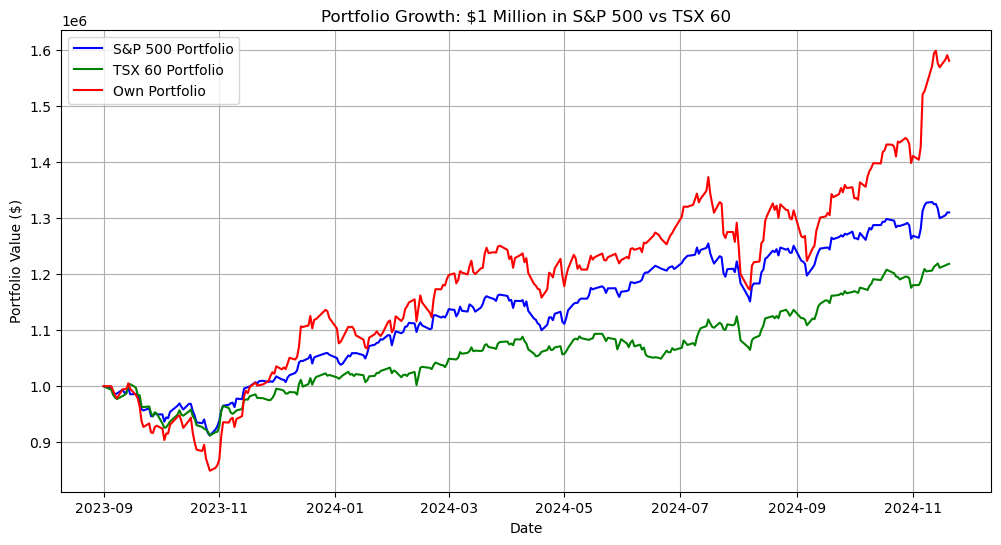

In [31]:
# Define the tickers for S&P 500 and TSX 60
sp500_ticker = "^GSPC"  # S&P 500 Index
tsx60_ticker = "^GSPTSE"  # TSX 60 Index

# Fetch the historical data (we'll use the last 5 years for this example)
start_date = "2023-09-01"
end_date = "2024-11-21"

sp500_data = yf.Ticker(sp500_ticker).history(start=start_date, end=end_date)
tsx60_data = yf.Ticker(tsx60_ticker).history(start=start_date, end=end_date)

# Set the initial investment for each portfolio
initial_investment = 1000000

sp500_data["Portfolio"] = (initial_investment/sp500_data['Close'].iloc[0])*sp500_data['Close']
tsx60_data["Portfolio"] = (initial_investment/tsx60_data['Close'].iloc[0])*tsx60_data['Close']

sp500_data["Portfolio2"] = 0

# Assuming Portfolio_Final is already defined
for i in range(len(Portfolio_Final["Ticker"])):
    ticker = yf.Ticker(Portfolio_Final["Ticker"].iloc[i])
    ticker_hist = ticker.history(start=start_date, end=end_date)
    
    sp500_data["Portfolio2"] += (1000000*Portfolio_Final["Weight"].iloc[i]/100)/(ticker_hist["Close"].iloc[0])*ticker_hist['Close']

# Now align the data based on the common date range
common_dates = sp500_data.index.intersection(tsx60_data.index)

# Reindex both series to ensure they match
sp500_data = sp500_data.loc[common_dates]
tsx60_data = tsx60_data.loc[common_dates]

# Plot the portfolio values
plt.figure(figsize=(12, 6))
plt.plot(sp500_data.index, sp500_data['Portfolio'], label='S&P 500 Portfolio', color='blue')
plt.plot(tsx60_data.index, tsx60_data['Portfolio'], label='TSX 60 Portfolio', color='green')
plt.plot(sp500_data.index, sp500_data['Portfolio2'], label='Own Portfolio', color='red')
plt.title('Portfolio Growth: $1 Million in S&P 500 vs TSX 60')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()



The graph above shows a historical comparison between the two markets we are trying to beat (both the S&P 500 and TSX60), and the portfolio we have built with the stocks from our final portfolio. This tests it historcially over apporximately one year, to confirm that our strategy is pretty effective for beating the market. As seen above, the portfolio we create is pretty responsive to the market itself, when the market falls, the portfolio falls greatly, but when the market is up, the portfolio outperforms the market by around 100% more profit compared toe the S&P, and by 200% more profit compared to the TSX60 during this time period.

In [32]:
print ("The total value of the Portfolio is: $", total_value)
total_weight = sum(Portfolio_Final["Weight"])

print("The total weight of each of the stocks in the portfolio add up to: ", round(total_weight), "%", )

Portfolio_Final

The total value of the Portfolio is: $ 999990.3646471062
The total weight of each of the stocks in the portfolio add up to:  100 %


,Ticker,Price,Currency,Shares,Value,Weight
1,TSLA,339.64,USD,185.884658,88205.585759,8.820644
2,SHOP.TO,148.81,CAD,569.339396,84723.395525,8.472421
3,SQ,92.70,USD,600.401014,77759.750912,7.776050
4,NVDA,146.67,USD,339.826733,69635.795680,6.963647
5,MS,134.99,USD,344.614724,64993.381858,6.499401
6,ARKK,54.77,USD,819.021014,62671.702926,6.267231
7,WFC,74.83,USD,532.857447,55708.375544,5.570891
8,CAT,389.59,USD,100.216438,54548.205931,5.454873
9,QQQ,504.98,USD,72.381501,51066.426991,5.106692
10,SPY,593.67,USD,60.168964,49905.836945,4.990632


The weights may be slightly less than the minimum (error of 0.001) because of rounding of certain values in the value column.

In [33]:
Stocks_Final = Portfolio_Final[['Ticker','Shares']]
Stocks_Final.to_csv('Stocks_Group_04.csv')

## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

Insert Names Here.